In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [4]:
transform = transforms.Compose(
    [transforms.Resize((32, 32)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
face_data = torchvision.datasets.ImageFolder(root = './face_age/', transform = transform)

In [6]:
def target_transform(id):
    return float(face_data.classes[id])

face_data.target_transform = transforms.Lambda(target_transform)

# if usual lambda - pickle error

In [7]:
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(list(range(len(face_data.imgs))), test_size=.3)

In [9]:
train_face_loader = torch.utils.data.DataLoader(face_data, batch_size=4, num_workers=4, sampler=SubsetRandomSampler(train))
test_face_loader = torch.utils.data.DataLoader(face_data, batch_size=4, num_workers=4, sampler=SubsetRandomSampler(test))

In [10]:
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

# dataiter = iter(train_face_loader)
# images, labels = dataiter.next()

# # show images
# out = torchvision.utils.make_grid(images)
# imshow(out)

In [11]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
dataiter = iter(train_face_loader)

In [ ]:
images, labels = dataiter.next()

In [ ]:
# show images
out = torchvision.utils.make_grid(images)
imshow(out)

In [ ]:
labels

In [15]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()#32*32
        # YOUR CODE
        # по аналогии с тем, что мы делали раньше

    def forward(self, x):
        # YOUR CODE
        return x


net = Net()

Т.к. задача регрессии, то нужно выбрать метрику - loss functions

In [17]:
import torch.optim as optim

criterion = # YOUR CODE
optimizer = # YOUR CODE

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [1]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_face_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.float()
        labels = labels.float()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = outputs.view(-1)
        # YOUR CODE - код для обучения

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    
            # ...log the running loss
            # YOUR CODE

print('Finished Training')

NameError: name 'train_face_loader' is not defined

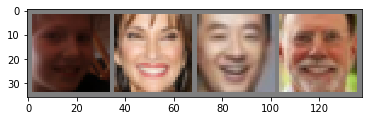

Predicted:  26.506023 68.86649 28.813244 65.999466
Ground Truth:   15.0      60.0      28.0      60.0


In [21]:

dataiter = iter(test_face_loader)
images, labels = dataiter.next()
net.eval()
with torch.no_grad():
    outputs = net(images)
    outputs = outputs.view(-1)
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('Predicted: ', ' '.join('%3s' % str(list(outputs.detach().numpy())[j])
                                  for j in range(4)))
    print('Ground Truth: ', '     '.join('%5s' % str(labels.numpy()[j])
                                  for j in range(4)))

In [22]:
abs_errors = 0
square_error = 0
net.eval()
with torch.no_grad():
    for data in test_face_loader:
        images, labels = data
        outputs = net(images)
        outputs = outputs.view(-1)
        
        abs_errors += sum(abs(list(outputs.detach().numpy())-labels.numpy()))
        square_error += sum(np.square(list(outputs.detach().numpy())-labels.numpy()))

In [23]:
print('MAE: %.2f' % (abs_errors / len(test)))
print('MSE: %.1f' % (square_error / len(test)))

MAE: 8.93
MSE: 174.9
